In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/rating.csv")

df

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24


In [3]:
matrix = df.pivot(index='userId', columns='movieId', values='rating').T

matrix = matrix.dropna(axis=1, how='all')

# Drop rows where all values are NaN
matrix = matrix.dropna(axis=0, how='all')

/var/folders/sz/96b_h5gn3y33k0c7jsvrstmm0000gn/T/ipykernel_9483/3231942846.py:1: PerformanceWarning: The following operation may generate 3703856792 cells in the resulting pandas object.
  matrix = df.pivot(index='userId', columns='movieId', values='rating').T


In [4]:
matrix

userId,1,2,3,4,5,6,7,8,9,10,...,138484,138485,138486,138487,138488,138489,138490,138491,138492,138493
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,4.0,NaN,NaN,5.0,NaN,4.0,NaN,4.0,...,NaN,NaN,5.0,NaN,3.0,NaN,NaN,2.0,NaN,3.5
2,3.5,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,4.0
3,NaN,4.0,NaN,NaN,NaN,3.0,3.0,5.0,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Count missing values
na_count = matrix.isna().sum().sum()

# Total number of cells
total_cells = matrix.size

# Proportion of missing values
na_proportion = na_count / total_cells

print(f"Count of NaN: {na_count}")
print(f"Total cells: {total_cells}")
print(f"Proportion of NaN: {na_proportion:.2f}")

Count of NaN: 3683856529
Total cells: 3703856792
Proportion of NaN: 0.99


DEVIAMOS FAZER BAR PLOT PARA VER TP QUANTOS FILMES CADA PESSOA AVALIA E QTS FILMES SAO AVALIADOS POR PESSOAS DIFERENTES

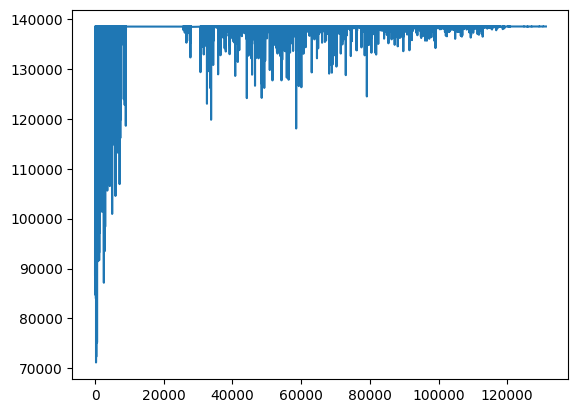

In [6]:
na_per_row = matrix.isna().sum(axis=1)
plt.plot(na_per_row) # qnt mais elevado, mais nan tem na linha

In [7]:
# Filter rows with <= max_nans NaNs
filter_matrix = matrix[matrix.isna().sum(axis=1) <= 135000]

In [8]:
# Count missing values
na_count = filter_matrix.isna().sum().sum()

# Total number of cells
total_cells = filter_matrix.size

# Proportion of missing values
na_proportion = na_count / total_cells

print(f"Count of NaN: {na_count}")
print(f"Total cells: {total_cells}")
print(f"Proportion of NaN: {na_proportion:.2f}")

Count of NaN: 176279614
Total cells: 190704861
Proportion of NaN: 0.92


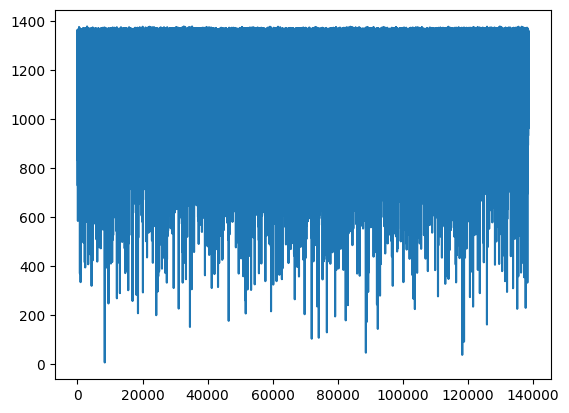

In [9]:
na_per_col = filter_matrix.isna().sum(axis=0)
plt.plot(na_per_col) # qnt mais elevado, mais nan tem na coluna

In [10]:
# Filter columns with <= max_nans NaNs
filter_matrix = filter_matrix.loc[:, filter_matrix.isna().sum(axis=0) <= 600]

In [11]:
# Count missing values
na_count = filter_matrix.isna().sum().sum()

# Total number of cells
total_cells = filter_matrix.size

# Proportion of missing values
na_proportion = na_count / total_cells

print(f"Count of NaN: {na_count}")
print(f"Total cells: {total_cells}")
print(f"Proportion of NaN: {na_proportion:.2f}")

Count of NaN: 250001
Total cells: 728433
Proportion of NaN: 0.34


# (1682, 943)

TAMANHO DO DATASET DA PROFESSORA

In [12]:
filter_matrix

userId,156,775,903,982,1507,1849,2261,2397,2669,3318,...,136599,136875,136989,137037,137202,137277,137343,137686,137885,138208
movieId,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.5,4.0,3.0,4.0,4.5,3.0,4.0,3.0,4.5,...,4.0,4.0,2.0,4.0,4.5,4.0,4.0,5.0,5.0,3.0
2,5.0,2.0,4.0,2.0,3.0,3.0,3.5,4.0,3.5,3.0,...,2.0,3.0,2.0,3.0,2.5,2.5,2.5,3.0,3.0,2.0
3,2.0,3.5,2.0,2.0,2.5,2.5,2.5,4.0,3.0,3.0,...,NaN,NaN,NaN,2.0,3.5,3.0,3.5,3.0,4.0,2.0
5,3.0,1.0,3.0,2.5,1.5,3.0,1.0,4.0,NaN,2.5,...,NaN,NaN,4.5,3.0,NaN,3.0,3.5,NaN,3.0,2.0
6,4.0,3.5,4.0,3.5,3.0,NaN,3.5,4.0,3.5,3.0,...,3.5,4.0,4.0,5.0,3.0,4.0,NaN,4.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.5,3.0,NaN,NaN,3.0,NaN,NaN,NaN,3.5
89745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,...,NaN,NaN,3.0,NaN,4.0,3.5,5.0,NaN,NaN,NaN
91500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,0.5,NaN,4.0,3.0,3.0,NaN,NaN,NaN
